In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import export_text
from sklearn.metrics import precision_score, recall_score, auc
from sklearn.metrics import roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn import linear_model
import warnings
warnings.filterwarnings('ignore')
 
df_train = pd.read_csv("train.csv") 

# Data cleaning

In [6]:
df_train.head() 
# how many columns and rows in dataframe 
print('shape:')
print(df_train.shape) 
print()
print('isNull:')
print(df_train.isnull().sum())
print()
# are there duplicate values? 
print('Duplicated values:')
print(format(len(df_train[df_train.duplicated()])))
print()
# standard statistical measures 
df_train.describe(percentiles = [.25, .5, .75, .90 ,.95, .99]) 

shape:
(891, 12)

isNull:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Duplicated values:
0



PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
90%     802.000000    1.000000    3.000000   50.000000    1.000000   
95%     846.500000    1.000000    3.000000   56.000000    3.000000   
99%     882.100000    1.000000    3.000000   65.870000    5.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
90%      2.000000   77.958300  
95%      2.000000  112.079150  
99%      4.000000  249.006220  
max      6.000000  512.329200

In [7]:
average_man_age = df_train['Age'].where(df_train['Name'].str.contains("Mr.")).mean()
average_woman_age = df_train['Age'].where(df_train['Name'].str.contains("Mrs.")).mean()
average_boy_age = df_train['Age'].where(df_train['Name'].str.contains("Master.")).mean()
average_girl_age = df_train['Age'].where(df_train['Name'].str.contains("Miss.")).mean()

df_train.loc[df_train.Age.isnull() & df_train['Name'].str.contains("Mr."), 'Age'] = average_man_age
df_train.loc[df_train.Age.isnull() & df_train['Name'].str.contains("Dr."), 'Age'] = average_man_age
df_train.loc[df_train.Age.isnull() & df_train['Name'].str.contains("Mrs."), 'Age'] = average_woman_age
df_train.loc[df_train.Age.isnull() & df_train['Name'].str.contains("Master."), 'Age'] = average_boy_age
df_train.loc[df_train.Age.isnull() & df_train['Name'].str.contains("Miss."), 'Age'] = average_girl_age

df_train.drop(columns=['Cabin', 'Embarked'], inplace=True)

print('isNull:')
print(df_train.isnull().sum())

isNull:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
dtype: int64


In [8]:
df_train = df_train[['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Survived']]
df_train

PassengerId  Pclass                                               Name  \
0              1       3                            Braund, Mr. Owen Harris   
1              2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2              3       3                             Heikkinen, Miss. Laina   
3              4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4              5       3                           Allen, Mr. William Henry   
..           ...     ...                                                ...   
886          887       2                              Montvila, Rev. Juozas   
887          888       1                       Graham, Miss. Margaret Edith   
888          889       3           Johnston, Miss. Catherine Helen "Carrie"   
889          890       1                              Behr, Mr. Karl Howell   
890          891       3                                Dooley, Mr. Patrick   

        Sex        Age  SibSp  Parch            Ticket     Fare  Survived  
0      male  22.000000      1      0         A/5 21171   7.2500         0  
1    female  38.000000      1      0          PC 17599  71.2833         1  
2    female  26.000000      0      0  STON/O2. 3101282   7.9250         1  
3    female  35.000000      1      0            113803  53.1000         1  
4      male  35.000000      0      0            373450   8.0500         0  
..      ...        ...    ...    ...               ...      ...       ...  
886    male  27.000000      0      0            211536  13.0000         0  
887  female  19.000000      0      0            112053  30.0000         1  
888  female  21.773973      1      2        W./C. 6607  23.4500         0  
889    male  26.000000      0      0            111369  30.0000         1  
890    male  32.000000      0      0            370376   7.7500         0  

[891 rows x 10 columns]

# Data Exploration

PassengerId    Pclass       Age     SibSp     Parch      Fare  \
PassengerId     1.000000 -0.035144  0.041894 -0.057527 -0.001652  0.012658   
Pclass         -0.035144  1.000000 -0.337992  0.083081  0.018443 -0.549500   
Age             0.041894 -0.337992  1.000000 -0.269600 -0.199482  0.087216   
SibSp          -0.057527  0.083081 -0.269600  1.000000  0.414838  0.159651   
Parch          -0.001652  0.018443 -0.199482  0.414838  1.000000  0.216225   
Fare            0.012658 -0.549500  0.087216  0.159651  0.216225  1.000000   
Survived       -0.005007 -0.338481 -0.095107 -0.035322  0.081629  0.257307   

             Survived  
PassengerId -0.005007  
Pclass      -0.338481  
Age         -0.095107  
SibSp       -0.035322  
Parch        0.081629  
Fare         0.257307  
Survived     1.000000

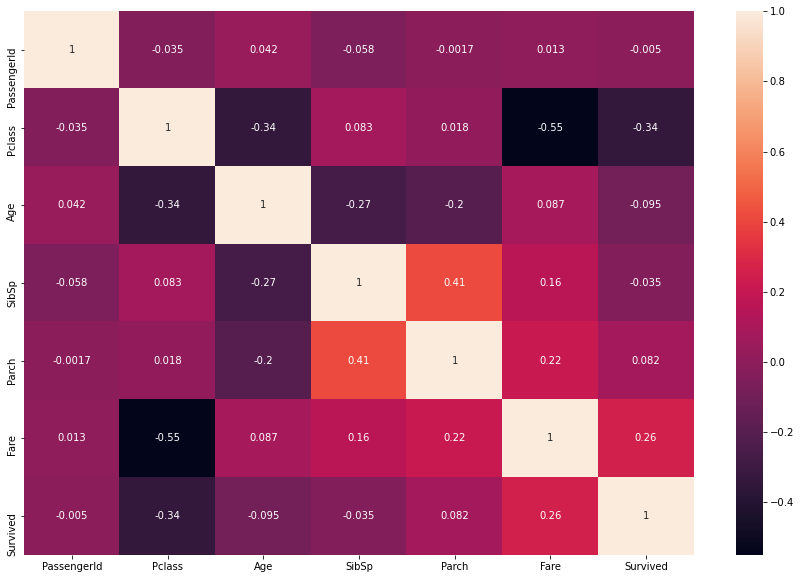

In [9]:
plt.figure(figsize=(15,10)) 
sns.heatmap(df_train.corr(method='pearson', min_periods=1),annot=True) 
df_train.corr() 

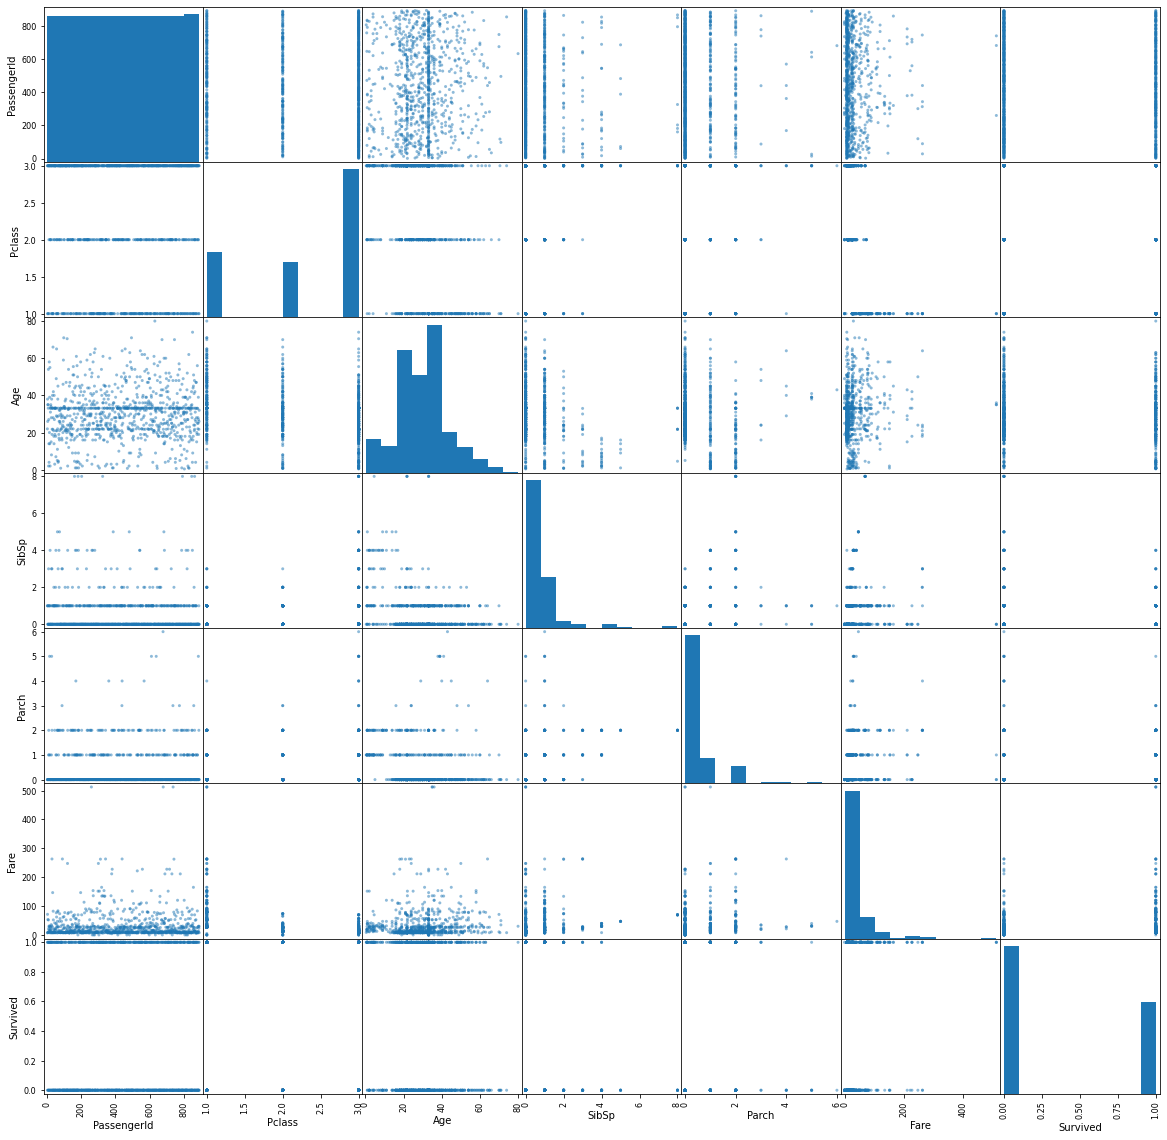

In [10]:
pd.plotting.scatter_matrix(df_train,figsize=[20,20])

plt.show() 

<Figure size 1080x1080 with 0 Axes>

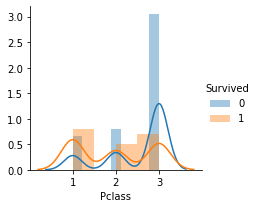

<Figure size 1440x1440 with 0 Axes>

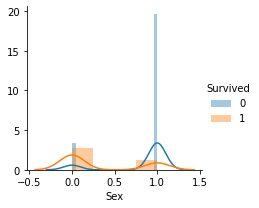

<Figure size 1440x1440 with 0 Axes>

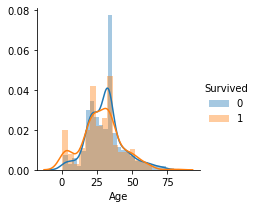

<Figure size 1440x1440 with 0 Axes>

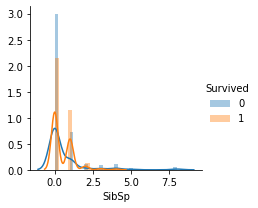

<Figure size 1440x1440 with 0 Axes>

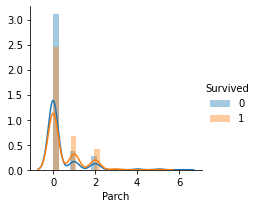

<Figure size 1440x1440 with 0 Axes>

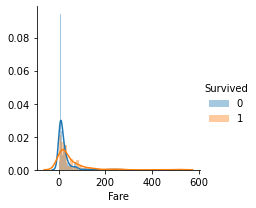

<Figure size 1440x1440 with 0 Axes>

In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
gender_encoded = encoder.fit_transform(df_train['Sex'])

df_train['Sex'] = gender_encoded

nrow, ncol = df_train.shape
predictors = df_train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]

plt.figure(figsize=(15,15))
for column in predictors:
    sns.FacetGrid(df_train, hue="Survived", height=3).map(sns.distplot, df_train[column].name).add_legend()
    fig = plt.figure(figsize=(20,20))
    fig = plt.show()

# Decision Tree

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix

from sklearn.model_selection import train_test_split

X = df_train.drop(['Survived', 'Name', 'Ticket'], axis=1)
y = df_train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

X_train.shape, X_test.shape

((623, 7), (268, 7))

Model accuracy score with criterion gini index: 0.74
Average 10-Fold CV Score:0.76


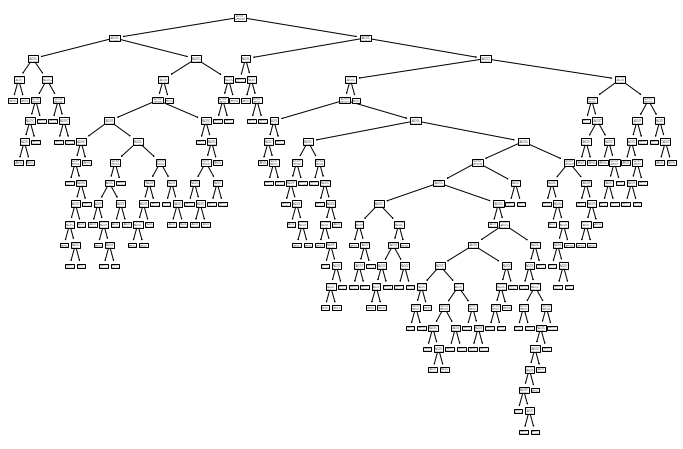

In [13]:
from sklearn.model_selection import cross_val_score

#Decision Tree Classifier with criterion gini index 

mytree_gini = DecisionTreeClassifier(criterion='gini')
          
#Visualize decision-trees
plt.figure(figsize=(12,8))
tree.plot_tree(mytree_gini.fit(X_train, y_train))

#fit the model and make prediction

mytree_gini.fit(X_train, y_train)
#Predict the Test set results with criterion gini index
y_pred_gini = mytree_gini.predict(X_test)

#Check accuracy score with criterion gini index
cv= cross_val_score(mytree_gini,X,y,cv=10)
print('Model accuracy score with criterion gini index: {0:0.2f}'. format(accuracy_score(y_test, y_pred_gini)))
print('Average 10-Fold CV Score:{0:0.2f}'.format(np.mean(cv)))

# This is the base model, with no pruning

max_leaf_nodes=2 Average 10-Fold CV Score:0.786729088639201 Node count:3
max_leaf_nodes=3 Average 10-Fold CV Score:0.7733208489388266 Node count:5
max_leaf_nodes=4 Average 10-Fold CV Score:0.773358302122347 Node count:7
max_leaf_nodes=5 Average 10-Fold CV Score:0.777852684144819 Node count:9
max_leaf_nodes=6 Average 10-Fold CV Score:0.8002621722846441 Node count:11
max_leaf_nodes=7 Average 10-Fold CV Score:0.8249063670411985 Node count:13
max_leaf_nodes=8 Average 10-Fold CV Score:0.8237827715355804 Node count:15
max_leaf_nodes=9 Average 10-Fold CV Score:0.8047940074906366 Node count:17
max_leaf_nodes=10 Average 10-Fold CV Score:0.8081148564294631 Node count:19
max_leaf_nodes=11 Average 10-Fold CV Score:0.8103620474406992 Node count:21
max_leaf_nodes=12 Average 10-Fold CV Score:0.8103620474406992 Node count:23
max_leaf_nodes=13 Average 10-Fold CV Score:0.812609238451935 Node count:25
max_leaf_nodes=14 Average 10-Fold CV Score:0.8182272159800249 Node count:27


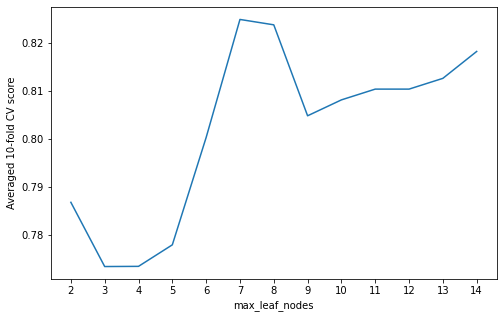

'The best number of max_leaf_nodes is 7'

In [14]:
mytree_gini = DecisionTreeClassifier(criterion='gini')

predictors = X
target = y
cv= cross_val_score(mytree_gini,predictors,target,cv=10)

maxleaf_cv=[]
node_counts=[]
for k in range(2,15,1):
    dt=DecisionTreeClassifier(max_leaf_nodes=k,random_state=47)
    dt.fit(X_train,y_train)
    predict=dt.predict(X_test)
    cv= cross_val_score(dt,predictors,target,cv=10)
    nodecount = dt.tree_.node_count
    print("max_leaf_nodes={}".format(k), "Average 10-Fold CV Score:{}".format(np.mean(cv)),
          "Node count:{}".format(nodecount))
    maxleaf_cv.append(np.mean(cv))
    node_counts.append(nodecount)     
fig,axes=plt.subplots(1,1,figsize=(8,5))
axes.set_xticks(range(1,15,1))
k=range(2,15,1)
plt.plot(k,maxleaf_cv)
plt.xlabel("max_leaf_nodes")
plt.ylabel("Averaged 10-fold CV score")
plt.show()

"""The best number of max_leaf_nodes is 7"""



Model accuracy score with criterion gini index: 0.81
max_leaf_nodes=10 Average 10-Fold CV Score:0.8081148564294631 Node count:27


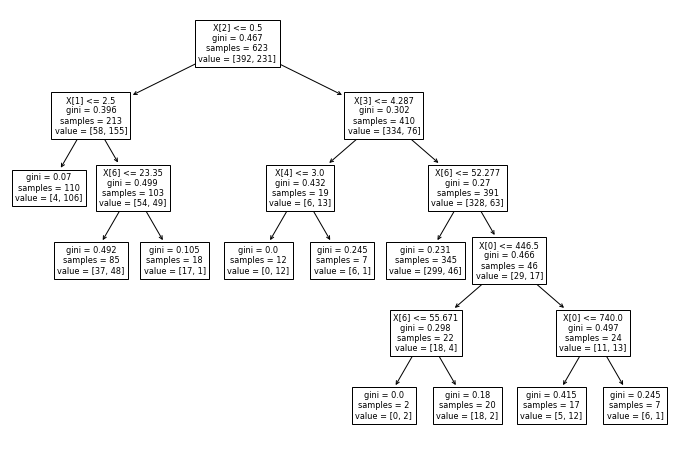

In [15]:
mytree_gini = DecisionTreeClassifier(criterion='gini', max_leaf_nodes=10)

#Visualize decision-trees
plt.figure(figsize=(12,8))
tree.plot_tree(mytree_gini.fit(X_train, y_train))

#fit the model and make prediction

mytree_gini.fit(X_train, y_train)
#Predict the Test set results with criterion gini index
y_pred_gini = mytree_gini.predict(X_test)

#Check accuracy score with criterion gini index
print('Model accuracy score with criterion gini index: {0:0.2f}'. format(accuracy_score(y_test, y_pred_gini)))

cv= cross_val_score(mytree_gini,predictors,target,cv=10)
print("max_leaf_nodes=10", "Average 10-Fold CV Score:{}".format(np.mean(cv)),
          "Node count:{}".format(nodecount))

max_depth=2 Average 10-Fold CV Score:0.773358302122347 Node count:7
max_depth=3 Average 10-Fold CV Score:0.8215480649188514 Node count:15
max_depth=4 Average 10-Fold CV Score:0.8036828963795255 Node count:29
max_depth=5 Average 10-Fold CV Score:0.7958052434456929 Node count:45
max_depth=6 Average 10-Fold CV Score:0.7958426966292135 Node count:63
max_depth=7 Average 10-Fold CV Score:0.8081523096129837 Node count:85
max_depth=8 Average 10-Fold CV Score:0.8036579275905119 Node count:107
max_depth=9 Average 10-Fold CV Score:0.7768039950062422 Node count:135
max_depth=10 Average 10-Fold CV Score:0.7767540574282147 Node count:159
max_depth=11 Average 10-Fold CV Score:0.7801248439450688 Node count:179
max_depth=12 Average 10-Fold CV Score:0.7744444444444445 Node count:195
max_depth=13 Average 10-Fold CV Score:0.7666416978776529 Node count:213
max_depth=14 Average 10-Fold CV Score:0.7531585518102372 Node count:223
max_depth=15 Average 10-Fold CV Score:0.749812734082397 Node count:237
max_depth

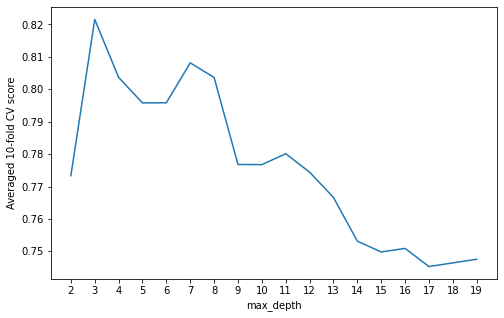

'The best score is when max_depth is equal to 3. The CV score is 0.8215480649188514 & the node count is 15.'

In [16]:
predictors = X
target = y
#10 fold cross-validation score:
mytree_gini = DecisionTreeClassifier(criterion='gini')
cv= cross_val_score(mytree_gini,predictors,target,cv=10)

max_depth=[]
node_counts=[]
for k in range(2,20,1):
    dt=DecisionTreeClassifier(max_depth=k,random_state=47)
    dt.fit(X_train,y_train)
    predict=dt.predict(X_test)
    cv= cross_val_score(dt,predictors,target,cv=10)
    nodecount = dt.tree_.node_count
    print("max_depth={}".format(k), "Average 10-Fold CV Score:{}".format(np.mean(cv)),
          "Node count:{}".format(nodecount))
    max_depth.append(np.mean(cv))
    node_counts.append(nodecount)     

fig,axes=plt.subplots(1,1,figsize=(8,5))
axes.set_xticks(range(1,20,1))
k=range(2,20,1)
plt.plot(k,max_depth)
plt.xlabel("max_depth")
plt.ylabel("Averaged 10-fold CV score")
plt.show()

"""The best score is when max_depth is equal to 3. The CV score is 0.8215480649188514 & the node count is 15."""

Model accuracy score with criterion gini index: 0.81


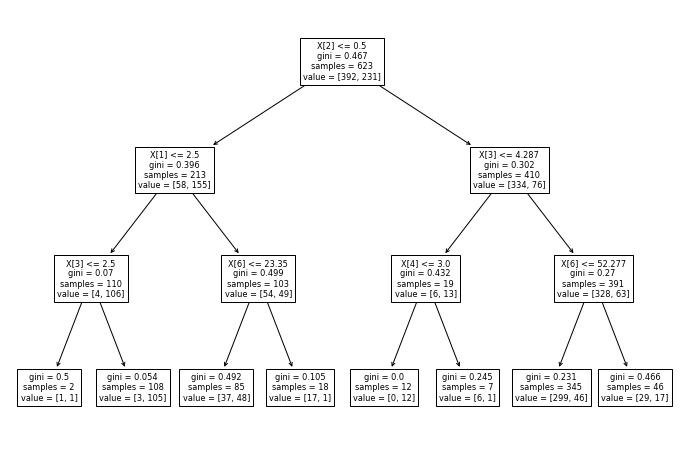

In [17]:
# Tree with max_depth= 3

mytree_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

#Visualize decision-trees
plt.figure(figsize=(12,8))
tree.plot_tree(mytree_gini.fit(X_train, y_train))

#fit the model and make prediction

mytree_gini.fit(X_train, y_train)
#Predict the Test set results with criterion gini index
y_pred_gini = mytree_gini.predict(X_test)

#Check accuracy score with criterion gini index
print('Model accuracy score with criterion gini index: {0:0.2f}'. format(accuracy_score(y_test, y_pred_gini)))

cv= cross_val_score(mytree_gini,predictors,target,cv=10)

Model accuracy score with criterion gini index: 0.81


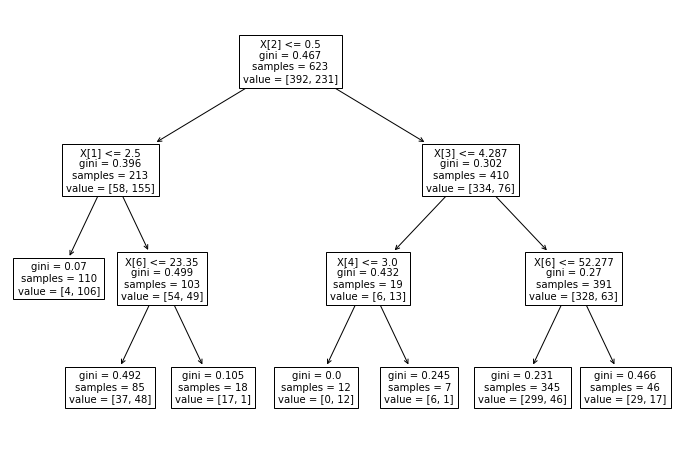

In [18]:
# Final decision tree model

mytree_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, max_leaf_nodes=7)

#Visualize decision-trees
plt.figure(figsize=(12,8))
tree.plot_tree(mytree_gini.fit(X_train, y_train))

#fit the model and make prediction

mytree_gini.fit(X_train, y_train)
#Predict the Test set results with criterion gini index
y_pred_gini = mytree_gini.predict(X_test)

#Check accuracy score with criterion gini index
print('Model accuracy score with criterion gini index: {0:0.2f}'. format(accuracy_score(y_test, y_pred_gini)))

cv= cross_val_score(mytree_gini,predictors,target,cv=10)

Number of tree nodes after optimizing max depth:  19


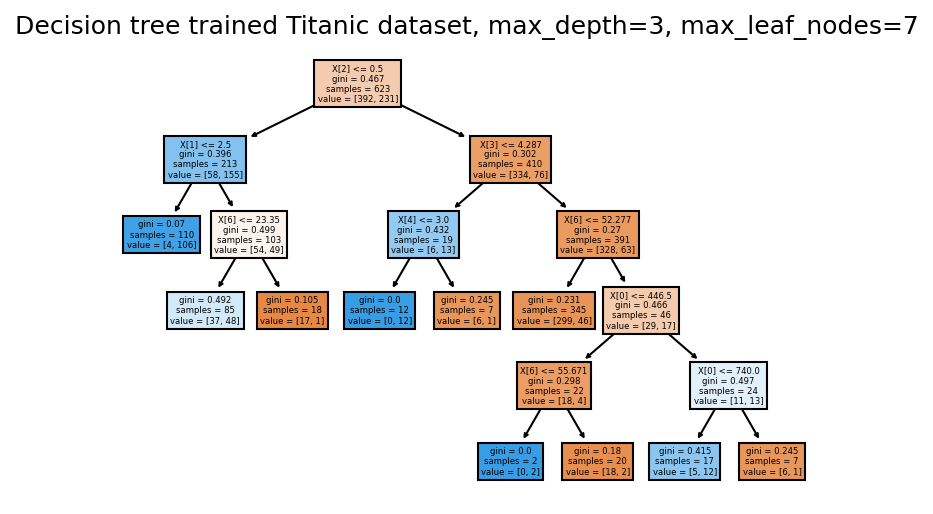

Accuracy score of our model with Decision Tree: 0.81
Precision score of our model with Decision Tree : 0.81
Recall score of our model with Decision Tree : 0.81
F1-score of our model with Decision Tree : 0.81


In [19]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

dt_opt=DecisionTreeClassifier(criterion='gini', max_depth=6, max_leaf_nodes=10)
dt_opt_fit=dt_opt.fit(X_train,y_train)
predict_opt=dt_opt.predict(X_test)
print('Number of tree nodes after optimizing max depth: ', dt_opt_fit.tree_.node_count) # Print out the result
plt.figure(dpi=150)
tree.plot_tree(dt_opt,filled=True)
plt.title("Decision tree trained Titanic dataset, max_depth=3, max_leaf_nodes=7")
plt.show() #show the tree


acc_score=accuracy_score(y_test, predict_opt)
print("Accuracy score of our model with Decision Tree:", '%.2f'%acc_score)
precision = precision_score(y_true=y_test, y_pred=predict_opt, average='micro')
print("Precision score of our model with Decision Tree :", '%.2f'%precision)
recall = recall_score(y_true=y_test, y_pred=predict_opt, average='micro')
print("Recall score of our model with Decision Tree :", '%.2f'%recall)
f1 = f1_score(y_true=y_test, y_pred=predict_opt, average='micro')
print("F1-score of our model with Decision Tree :", '%.2f'%f1)

Feature  Importance
2          Sex       0.604
1       Pclass       0.186
6         Fare       0.090
3          Age       0.073
4        SibSp       0.048
0  PassengerId       0.000
5        Parch       0.000

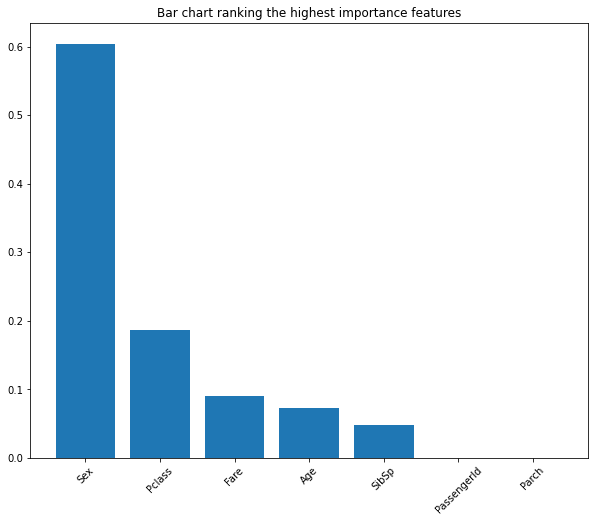

In [20]:
importances = pd.DataFrame({'Feature':X_train.columns,'Importance':np.round(mytree_gini.feature_importances_,3)})
importances = importances.sort_values('Importance',ascending=False)
importances
plt.figure(figsize=(10,8))
plt.title("Bar chart ranking the highest importance features")
plt.xticks(rotation = 45)
plt.bar(importances.Feature, importances.Importance)
importances

# Artificial Neural Network

In [68]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report

import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest

Feature PassengerId: 0.057195
Feature Pclass: 76.192029
Feature Sex: 282.511974
Feature Age: 4.853974
Feature SibSp: 2.440733
Feature Parch: 5.701765
Feature Fare: 43.639380


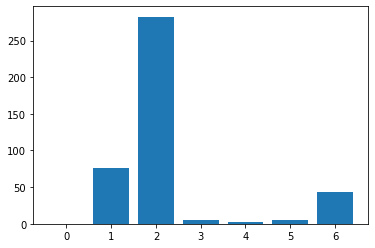

Sorted:
Sex: 282.5119741973314
Pclass: 76.19202949435896
Fare: 43.63938019249998
Parch: 5.701765490413207
Age: 4.853974496737395
SibSp: 2.4407330964554546
PassengerId: 0.05719458163603604


In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

# Ranking of all features based on ANOVA F-scores

fs = SelectKBest(score_func=f_classif, k='all') 
fs.fit(X_train, y_train)
# transform train input data
X_train_fs = fs.transform(X_train)
# transform test input data
X_test_fs = fs.transform(X_test)

labels = ['PassengerId', 'Pclass', 'Sex', 'Age', 
             'SibSp','Parch','Fare']

sorted_features = {}

fs_score_df=pd.DataFrame()
feature_no=0
feature_score=0
for i in range(len(fs.scores_)):
    sorted_features[labels[i]] = fs.scores_[i]
    print('Feature %s: %f' % (labels[i], fs.scores_[i]))
    fs_score_df = fs_score_df.append({feature_no:i,feature_score:fs.scores_[i]}, ignore_index=True)
    
    
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

fs.scores_.sort()


print("Sorted:")
sorted_features= dict(sorted(sorted_features.items(), key=lambda x: x[1], reverse=True))
for x in sorted_features:
    print(x + ": " + str(sorted_features[x]))

In [82]:
X = df_train[['Pclass', 'Sex', 'Age', 
             'SibSp','Parch','Fare']]

y = df_train['Survived']

sc = StandardScaler()
X = sc.fit_transform(X)

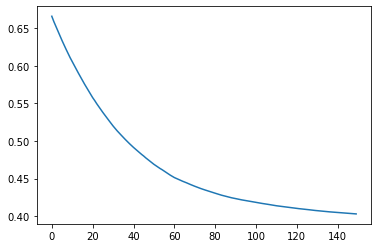

Number of neurons in hidden layer: (10,)
Number of iterations: 150
Ending loss: 0.402930404632678
MLP Accuracy: 80.22%
MLP Classification report:

               precision    recall  f1-score   support

           0       0.79      0.92      0.85       160
           1       0.84      0.63      0.72       108

    accuracy                           0.80       268
   macro avg       0.81      0.77      0.78       268
weighted avg       0.81      0.80      0.80       268

MLP Training set score: 83.31%
MLP Testing set score: 80.22%


In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

mlp = MLPClassifier(
    hidden_layer_sizes=(10,),
    max_iter=150,
    random_state=42
)
mlp.fit(X_train, y_train)
mlp_predict = mlp.predict(X_test)
loss_values = mlp.loss_curve_


plt.plot(loss_values)
plt.show()
print('Number of neurons in hidden layer: {}'.format(mlp.hidden_layer_sizes))
print('Number of iterations: {}'.format(mlp.n_iter_))
print('Ending loss: {}'.format(mlp.loss_))
print('MLP Accuracy: {:.2f}%'.format(accuracy_score(y_test, mlp_predict) * 100))
print('MLP Classification report:\n\n', classification_report(y_test, mlp_predict))
print('MLP Training set score: {:.2f}%'.format(mlp.score(X_train, y_train) * 100))
print('MLP Testing set score: {:.2f}%'.format(mlp.score(X_test, y_test) * 100))

In [84]:
kfold = StratifiedKFold(10,random_state=42, shuffle=True)
# enumerate splits
scores = list()
predicted_targets = np.array([])
actual_targets = np.array([])
mlp_predict_proba= np.array([])
mlp_predict = np.array([])
X_test=np.array([])

for train_ix, test_ix in kfold.split(X, y):
    # split data
    X_train, X_test, y_train, y_test = X[train_ix], X[test_ix], y[train_ix], y[test_ix]
    # fit the model
    mlp.fit(X_train, y_train)

    mlp_predict = mlp.predict(X_test)
    predicted_targets = np.append(predicted_targets, mlp_predict)
    actual_targets = np.append(actual_targets, y_test)

    # evaluate on predictions
    score_test = accuracy_score(y_test, mlp_predict)
    print('score_test: %.3f' % score_test)
    X_test.shape
    scores.append(score_test)

# summarize all scores
print('MLP Accuracy: {:.2f}%'.format(accuracy_score(actual_targets, predicted_targets) * 100))

score_test: 0.844
score_test: 0.775
score_test: 0.809
score_test: 0.820
score_test: 0.764
score_test: 0.820
score_test: 0.809
score_test: 0.820
score_test: 0.854
score_test: 0.843
MLP Accuracy: 81.59%


In [85]:
# 2 Hidden layer testing

kfold = StratifiedKFold(10,random_state=42, shuffle=True)
# enumerate splits
scores = list()
predicted_targets = np.array([])
actual_targets = np.array([])
mlp_predict = np.array([])
X_test=np.array([])

neuron_dist = {}
best_accuracy = {}

for k in range(1, 25):
    mlp = MLPClassifier(
        hidden_layer_sizes=(25-k,k),
        max_iter=150,
        random_state=42
    )
    for train_ix, test_ix in kfold.split(X, y):
        # split data
        X_train, X_test, y_train, y_test = X[train_ix], X[test_ix], y[train_ix], y[test_ix]
        # fit the model
        mlp.fit(X_train, y_train)

        mlp_predict = mlp.predict(X_test)
        predicted_targets = np.append(predicted_targets, mlp_predict)
        actual_targets = np.append(actual_targets, y_test)

        # evaluate on predictions
        score_test = accuracy_score(y_test, mlp_predict)
        #print('score_test: %.3f' % score_test)
        X_test.shape
        scores.append(score_test)
    neuron_dist[k] = [25-k,k]
    best_accuracy[k] = accuracy_score(actual_targets, predicted_targets)
    print(("hidden_layer_sizes= ({},{}): ".format(25-k,k)) + str(accuracy_score(actual_targets, predicted_targets)))
    scores.clear()
    mlp_predict = np.array([])
    predicted_targets = np.array([])
    actual_targets = np.array([])
    X_test=np.array([])

hidden_layer_sizes= (24,1): 0.8058361391694725
hidden_layer_sizes= (23,2): 0.8058361391694725
hidden_layer_sizes= (22,3): 0.8103254769921436
hidden_layer_sizes= (21,4): 0.8170594837261503
hidden_layer_sizes= (20,5): 0.8103254769921436
hidden_layer_sizes= (19,6): 0.8204264870931538
hidden_layer_sizes= (18,7): 0.8103254769921436
hidden_layer_sizes= (17,8): 0.8148148148148148
hidden_layer_sizes= (16,9): 0.8159371492704826
hidden_layer_sizes= (15,10): 0.8047138047138047
hidden_layer_sizes= (14,11): 0.8114478114478114
hidden_layer_sizes= (13,12): 0.8092031425364759
hidden_layer_sizes= (12,13): 0.8249158249158249
hidden_layer_sizes= (11,14): 0.8125701459034792
hidden_layer_sizes= (10,15): 0.8114478114478114
hidden_layer_sizes= (9,16): 0.8092031425364759
hidden_layer_sizes= (8,17): 0.8114478114478114
hidden_layer_sizes= (7,18): 0.8013468013468014
hidden_layer_sizes= (6,19): 0.8114478114478114
hidden_layer_sizes= (5,20): 0.7901234567901234
hidden_layer_sizes= (4,21): 0.8080808080808081
hidden_

In [86]:
# Print each model and accuracy
i = 1
for value in best_accuracy.values():
    print("({}-{}),{}".format((25-i),i,value))
    i += 1

(24-1),0.8058361391694725
(23-2),0.8058361391694725
(22-3),0.8103254769921436
(21-4),0.8170594837261503
(20-5),0.8103254769921436
(19-6),0.8204264870931538
(18-7),0.8103254769921436
(17-8),0.8148148148148148
(16-9),0.8159371492704826
(15-10),0.8047138047138047
(14-11),0.8114478114478114
(13-12),0.8092031425364759
(12-13),0.8249158249158249
(11-14),0.8125701459034792
(10-15),0.8114478114478114
(9-16),0.8092031425364759
(8-17),0.8114478114478114
(7-18),0.8013468013468014
(6-19),0.8114478114478114
(5-20),0.7901234567901234
(4-21),0.8080808080808081
(3-22),0.7586980920314254
(2-23),0.7822671156004489
(1-24),0.7373737373737373


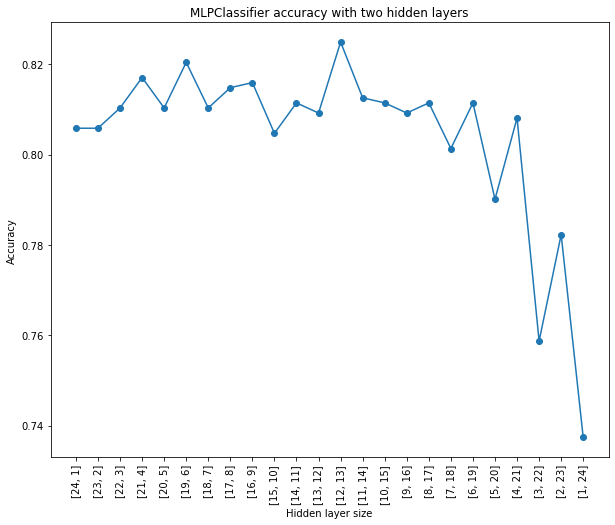

In [87]:
x = neuron_dist.values()

xi = list(range(len(x)))

plt.figure(figsize=[10,8])
plt.title("MLPClassifier accuracy with two hidden layers")

plt.ylabel("Accuracy")
plt.xlabel("Hidden layer size")
plt.xticks(xi, x, rotation=90)

plt.plot(best_accuracy.values(), marker='o')

In [130]:
# Final MLP model

X = df_train[['Pclass', 'Sex', 'Age', 
             'SibSp','Parch','Fare']]

y = df_train['Survived']

sc = StandardScaler()
X = sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

mlp = MLPClassifier(
    hidden_layer_sizes=(12,13),
    max_iter=150,
    random_state=42
)
# fit the model
mlp.fit(X_train, y_train)

mlp_predict = mlp.predict(X_test)
predicted_targets = np.append(predicted_targets, mlp_predict)
actual_targets = np.append(actual_targets, y_test)

# evaluate on predictions
score_test = accuracy_score(y_test, mlp_predict)

print(("hidden_layer_sizes= ({},{}): ".format(12, 13)) + str(score_test))

hidden_layer_sizes= (12,13): 0.8208955223880597


# kNN

In [110]:
from sklearn.neighbors import KNeighborsClassifier

X = df_train.drop(['Survived', 'Name', 'Ticket'], axis=1)
y = df_train['Survived']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42, stratify=y)

test_scores = []
train_scores = []

for i in range(1,30):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))
    
## Find the max score from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
max_test_score = max(test_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max train score 100.0 % and k = [1]
Max test score 66.7910447761194 % and k = [19, 22]


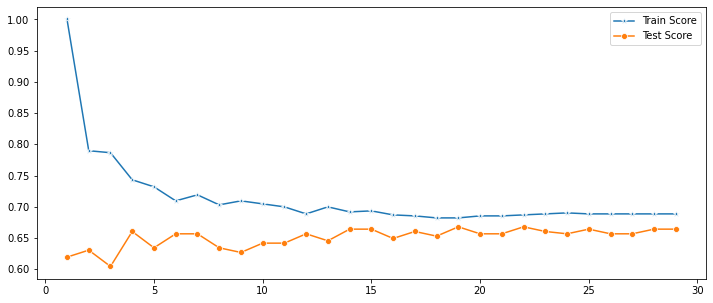

In [111]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,30),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,30),test_scores,marker='o',label='Test Score')

# Model comparision

The kNN model is not impressive at all.

The decision tree and neural network have very similiar accuracy scores in prediciting if someone survived the Titanic or not, so it is hard to say which model is more viable to use.

Ultimately I will go with the MLP two hidden layer model (12, 13) with 150 iterations as it provided the highest accuracy (82%).

In [149]:
df_test = pd.read_csv("test.csv")

In [150]:
df_test.head() 

print('shape:')
print(df_test.shape) 
print()
print('isNull:')
print(df_test.isnull().sum())
print()

print('Duplicated values:')
print(format(len(df_test[df_test.duplicated()])))
print()
# standard statistical measures 
df_test.describe(percentiles = [.25, .5, .75, .90 ,.95, .99]) 

shape:
(418, 11)

isNull:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Duplicated values:
0



PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
90%    1267.300000    3.000000   50.000000    1.000000    1.300000   79.200000
95%    1288.150000    3.000000   57.000000    2.000000    2.000000  151.550000
99%    1304.830000    3.000000   64.000000    4.000000    4.000000  262.375000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200

In [151]:
df_test.loc[df_test.Age.isnull() & df_test['Name'].str.contains("Mr."), 'Age'] = average_man_age
df_test.loc[df_test.Age.isnull() & df_test['Name'].str.contains("Dr."), 'Age'] = average_man_age
df_test.loc[df_test.Age.isnull() & df_test['Name'].str.contains("Mrs."), 'Age'] = average_woman_age

df_test.loc[df_test.Age.isnull() & df_test['Name'].str.contains("Master."), 'Age'] = average_boy_age
df_test.loc[df_test.Age.isnull() & df_test['Name'].str.contains("Miss."), 'Age'] = average_girl_age

df_test.drop(columns=['Cabin', 'Embarked'], inplace=True)

print('isNull:')
print(df_test.isnull().sum())

isNull:
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            1
SibSp          0
Parch          0
Ticket         0
Fare           1
dtype: int64


In [152]:
df_test.loc[df_test.Fare.isnull() | df_test.Age.isnull()]

PassengerId  Pclass                     Name     Sex   Age  SibSp  Parch  \
88           980       3  O'Donoghue, Ms. Bridget  female   NaN      0      0   
152         1044       3       Storey, Mr. Thomas    male  60.5      0      0   

     Ticket  Fare  
88   364856  7.75  
152    3701   NaN

In [156]:
df_test.loc[df_test.Age.isnull() & df_test['Name'].str.contains("Ms."), 'Age'] = average_woman_age
average_fare = df_test.Fare.mean()
df_test.loc[df_test.Fare.isnull(), 'Fare'] = average_fare

In [158]:
print('isNull:')
print(df_test.isnull().sum())

isNull:
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
dtype: int64


In [161]:
label_encoder = LabelEncoder()

df_test['Sex'] = label_encoder.fit_transform(df_test['Sex'])

X = df_test[['Pclass', 'Sex', 'Age', 
             'SibSp','Parch','Fare']]

sc = StandardScaler()
X = sc.fit_transform(X)

In [166]:
mlp_predict = mlp.predict(X)

In [169]:
mlp_predict

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [177]:
df_submission = pd.read_csv("test.csv")
df_submission = pd.DataFrame(df_submission['PassengerId'])
df_submission['Survived'] = mlp_predict

In [178]:
df_submission

PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         1

[418 rows x 2 columns]

In [180]:
df_submission.to_csv('submission.csv', index=False)

# Kaggle competition results: Rank #840

YOUR RECENT SUBMISSION
submission.csv
Submitted by James S · Submitted a minute ago

Score: 0.79425